In [1]:
import matplotlib.pyplot as plt 
import scipy.misc

import numpy as np
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation, Add, merge, concatenate
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from keras import __version__ as kv
from scipy import __version__ as sv
from matplotlib import __version__ as mv
from numpy import __version__ as nv

print kv
print sv
print mv
print nv

Using TensorFlow backend.


2.0.5
0.19.1
2.0.0
1.13.0


In [2]:
# Local files
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

# Data

### Config

In [3]:
trained_model_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/trained_models/2.1-mph_as-best_baseline_with_distance_feature/'

In [4]:
train_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/train/50x50/'
valid_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50/'

In [5]:
input_shape = (50, 50, 1)
num_classes = 3

### Convert tif2png

Done in 1.0-mph_as_kd-baseline-simple_CNN_from_scratch.ipynb

### Add dist2land feature

In [6]:
train_crops, train_filename, train_feature, train_class, \
valid_crops, valid_filename, valid_feature, valid_class = utils.add_dist2land_experiment_crops_20170815()

In [7]:
print "training crops:", len(train_crops)
print "training features:", len(train_feature)
print "validation crops:", len(valid_filename)
print "validation features:", len(valid_feature)
print type(train_crops), type(train_crops[0]), train_crops[0].shape

training crops: 1996
training features: 1996
validation crops: 499
validation features: 499
<type 'list'> <type 'numpy.ndarray'> (50, 50)


In [8]:
# Reshape for keras format
np_train_class = np.array(train_class)
np_train_filename = np.array(train_filename)
np_train_crops = np.array(train_crops)
np_train_feature = np.array(train_feature)

np_valid_class = np.array(valid_class)
np_valid_filename = np.array(valid_filename)
np_valid_crops = np.array(valid_crops)
np_valid_feature = np.array(valid_feature)

np_train_crops = np.expand_dims(np_train_crops, axis=3)
np_train_feature = np.expand_dims(np_train_feature, axis=1)

np_valid_crops = np.expand_dims(np_valid_crops, axis=3)
np_valid_feature = np.expand_dims(np_valid_feature, axis=1)

In [9]:
print np_train_crops.shape
print np_train_feature.shape
print np_train_class.shape

print np_valid_crops.shape
print np_valid_feature.shape
print np_valid_class.shape

(1996, 50, 50, 1)
(1996, 1)
(1996, 3)
(499, 50, 50, 1)
(499, 1)
(499, 3)


# Experiments

## baseline with distance feature

In [10]:
classifier_input = Input(shape=input_shape)
dist2land_input = Input(shape=(1,), name='dist2land_input')

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = merge([x, dist2land_input], 'concat')
out = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[classifier_input, dist2land_input], outputs=out)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.

/usr/local/lib/python2.7/dist-packages/keras/legacy/layers.py:460: UserWarning:

The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.



In [11]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 50, 50, 32)    320         input_1[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 25, 25, 32)    0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 25, 25, 64)    18496       max_pooling2d_1[0][0]            
___________________________________________________________________________________________

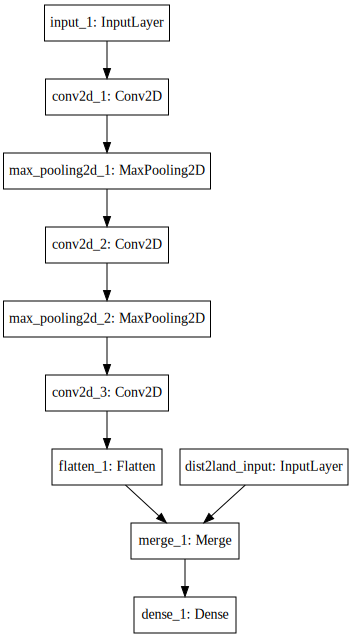

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [13]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 10s - loss: 2.4292 - acc: 0.7370 - val_loss: 0.2332 - val_acc: 0.9218
Epoch 2/10
1996/1996 [==============================] - 9s - loss: 0.2601 - acc: 0.9048 - val_loss: 0.3031 - val_acc: 0.9078
Epoch 3/10
1996/1996 [==============================] - 10s - loss: 0.1886 - acc: 0.9274 - val_loss: 0.4452 - val_acc: 0.8737
Epoch 4/10
1996/1996 [==============================] - 10s - loss: 0.1408 - acc: 0.9469 - val_loss: 0.4356 - val_acc: 0.8457
Epoch 5/10
1996/1996 [==============================] - 10s - loss: 0.0982 - acc: 0.9659 - val_loss: 0.2445 - val_acc: 0.9319
Epoch 6/10
1996/1996 [==============================] - 10s - loss: 0.0879 - acc: 0.9684 - val_loss: 0.3666 - val_acc: 0.9158
Epoch 7/10
1996/1996 [==============================] - 10s - loss: 0.0644 - acc: 0.9795 - val_loss: 0.2025 - val_acc: 0.9379
Epoch 8/10
1996/1996 [==============================] - 10s - loss: 0.06

In [15]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 10s - loss: 0.0085 - acc: 0.9975 - val_loss: 0.2420 - val_acc: 0.9379
Epoch 2/10
1996/1996 [==============================] - 10s - loss: 0.0032 - acc: 0.9995 - val_loss: 0.2504 - val_acc: 0.9419
Epoch 3/10
1996/1996 [==============================] - 10s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.2655 - val_acc: 0.9439
Epoch 4/10
1996/1996 [==============================] - 10s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.2793 - val_acc: 0.9459
Epoch 5/10
1996/1996 [==============================] - 10s - loss: 7.6893e-04 - acc: 1.0000 - val_loss: 0.3214 - val_acc: 0.9399
Epoch 6/10
1996/1996 [==============================] - 10s - loss: 5.6035e-04 - acc: 1.0000 - val_loss: 0.3183 - val_acc: 0.9459
Epoch 7/10
1996/1996 [==============================] - 10s - loss: 3.8343e-04 - acc: 1.0000 - val_loss: 0.3545 - val_acc: 0.9419
Epoch 8/10
1996/1996 [==============================] - 10s

In [16]:
lr = 0.00001
K.set_value(model.optimizer.lr, lr)
model.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 10s - loss: 7.1692e-05 - acc: 1.0000 - val_loss: 0.3542 - val_acc: 0.9459
Epoch 2/2
1996/1996 [==============================] - 10s - loss: 6.4194e-05 - acc: 1.0000 - val_loss: 0.3550 - val_acc: 0.9459


## baseline + batch_norm and distance feature

i.e. the best from 1.1 experiments.

In [17]:
classifier_input = Input(shape=input_shape)
dist2land_input = Input(shape=(1,), name='dist2land_input')

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = merge([x, dist2land_input], 'concat')
out = Dense(num_classes, activation='softmax')(x)

model_batchnorm = Model(inputs=[classifier_input, dist2land_input], outputs=out)
model_batchnorm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.



In [18]:
lr = 0.001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 14s - loss: 0.6383 - acc: 0.8322 - val_loss: 0.7210 - val_acc: 0.8096
Epoch 2/10
1996/1996 [==============================] - 14s - loss: 0.2682 - acc: 0.9078 - val_loss: 0.2976 - val_acc: 0.9018
Epoch 3/10
1996/1996 [==============================] - 14s - loss: 0.1746 - acc: 0.9384 - val_loss: 0.2536 - val_acc: 0.8998
Epoch 4/10
1996/1996 [==============================] - 14s - loss: 0.1509 - acc: 0.9464 - val_loss: 0.3524 - val_acc: 0.8818
Epoch 5/10
1996/1996 [==============================] - 14s - loss: 0.0994 - acc: 0.9654 - val_loss: 0.4276 - val_acc: 0.8898
Epoch 6/10
1996/1996 [==============================] - 14s - loss: 0.0743 - acc: 0.9734 - val_loss: 0.1825 - val_acc: 0.9299
Epoch 7/10
1996/1996 [==============================] - 14s - loss: 0.0681 - acc: 0.9780 - val_loss: 0.2924 - val_acc: 0.9359
Epoch 8/10
1996/1996 [==============================] - 14s - loss: 0.0

In [19]:
lr = 0.001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 14s - loss: 0.0377 - acc: 0.9850 - val_loss: 0.2579 - val_acc: 0.9379
Epoch 2/5
1996/1996 [==============================] - 14s - loss: 0.0197 - acc: 0.9935 - val_loss: 0.4814 - val_acc: 0.9138
Epoch 3/5
1996/1996 [==============================] - 14s - loss: 0.0183 - acc: 0.9915 - val_loss: 0.2723 - val_acc: 0.9539
Epoch 4/5
1996/1996 [==============================] - 14s - loss: 0.0152 - acc: 0.9940 - val_loss: 0.3367 - val_acc: 0.9359
Epoch 5/5
1996/1996 [==============================] - 14s - loss: 0.0143 - acc: 0.9945 - val_loss: 0.7156 - val_acc: 0.9058


In [20]:
lr = 0.0001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 14s - loss: 0.0084 - acc: 0.9970 - val_loss: 0.3335 - val_acc: 0.9459
Epoch 2/2
1996/1996 [==============================] - 14s - loss: 7.4193e-04 - acc: 1.0000 - val_loss: 0.3091 - val_acc: 0.9459


In [21]:
lr = 0.0001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 14s - loss: 3.5404e-04 - acc: 1.0000 - val_loss: 0.2793 - val_acc: 0.9459
Epoch 2/2
1996/1996 [==============================] - 14s - loss: 1.0960e-04 - acc: 1.0000 - val_loss: 0.2695 - val_acc: 0.9439


In [22]:
lr = 0.00001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=3,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/3
1996/1996 [==============================] - 14s - loss: 4.1928e-05 - acc: 1.0000 - val_loss: 0.2801 - val_acc: 0.9459
Epoch 2/3
1996/1996 [==============================] - 14s - loss: 3.8953e-05 - acc: 1.0000 - val_loss: 0.2824 - val_acc: 0.9459
Epoch 3/3
1996/1996 [==============================] - 14s - loss: 3.4342e-05 - acc: 1.0000 - val_loss: 0.2881 - val_acc: 0.9459


 batchnorm slightly better lets continue to investigate this direction.

## baseline + batchnorm with distance feature + more later dense layers

In [33]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = merge([x, dist2land_input], 'concat')
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
out = Dense(num_classes, activation='softmax')(x)

model_dense = Model(inputs=[classifier_input, dist2land_input], outputs=out)
model_dense.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.



In [34]:
model_dense.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_16 (Conv2D)               (None, 50, 50, 32)    320         input_2[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D)  (None, 25, 25, 32)    0           conv2d_16[0][0]                  
____________________________________________________________________________________________________
conv2d_17 (Conv2D)               (None, 25, 25, 64)    18496       max_pooling2d_11[0][0]           
___________________________________________________________________________________________

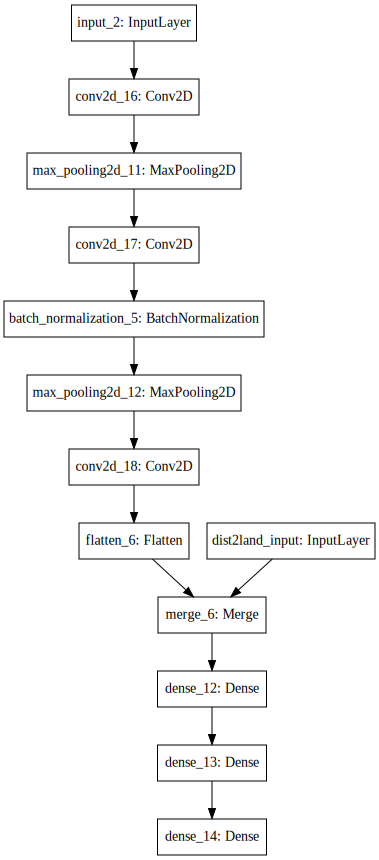

In [35]:
SVG(model_to_dot(model_dense).create(prog='dot', format='svg'))

In [37]:
lr = 0.001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 15s - loss: 0.5734 - acc: 0.8417 - val_loss: 0.2483 - val_acc: 0.9118
Epoch 2/10
1996/1996 [==============================] - 15s - loss: 0.2449 - acc: 0.9063 - val_loss: 0.3344 - val_acc: 0.8898
Epoch 3/10
1996/1996 [==============================] - 15s - loss: 0.1621 - acc: 0.9439 - val_loss: 0.2142 - val_acc: 0.9279
Epoch 4/10
1996/1996 [==============================] - 15s - loss: 0.1358 - acc: 0.9574 - val_loss: 0.2321 - val_acc: 0.9118
Epoch 5/10
1996/1996 [==============================] - 15s - loss: 0.0828 - acc: 0.9664 - val_loss: 0.1797 - val_acc: 0.9359
Epoch 6/10
1996/1996 [==============================] - 15s - loss: 0.0844 - acc: 0.9719 - val_loss: 0.2260 - val_acc: 0.9399
Epoch 7/10
1996/1996 [==============================] - 15s - loss: 0.0676 - acc: 0.9805 - val_loss: 0.2007 - val_acc: 0.9439
Epoch 8/10
1996/1996 [==============================] - 15s - loss: 0.0

In [38]:
lr = 0.001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 15s - loss: 0.0313 - acc: 0.9890 - val_loss: 0.3762 - val_acc: 0.9479
Epoch 2/5
1996/1996 [==============================] - 15s - loss: 0.0206 - acc: 0.9930 - val_loss: 0.3148 - val_acc: 0.9479
Epoch 3/5
1996/1996 [==============================] - 15s - loss: 0.0403 - acc: 0.9890 - val_loss: 0.4662 - val_acc: 0.9259
Epoch 4/5
1996/1996 [==============================] - 15s - loss: 0.0275 - acc: 0.9925 - val_loss: 0.2021 - val_acc: 0.9679
Epoch 5/5
1996/1996 [==============================] - 15s - loss: 0.0084 - acc: 0.9975 - val_loss: 0.5283 - val_acc: 0.9399


In [39]:
lr = 0.0001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 15s - loss: 0.0249 - acc: 0.9910 - val_loss: 0.3462 - val_acc: 0.9559
Epoch 2/5
1996/1996 [==============================] - 15s - loss: 0.0013 - acc: 0.9995 - val_loss: 0.3615 - val_acc: 0.9579
Epoch 3/5
1996/1996 [==============================] - 15s - loss: 4.3635e-04 - acc: 1.0000 - val_loss: 0.3464 - val_acc: 0.9579
Epoch 4/5
1996/1996 [==============================] - 15s - loss: 1.8558e-04 - acc: 1.0000 - val_loss: 0.3648 - val_acc: 0.9539
Epoch 5/5
1996/1996 [==============================] - 15s - loss: 3.3708e-05 - acc: 1.0000 - val_loss: 0.3672 - val_acc: 0.9599


In [40]:
lr = 0.00001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 15s - loss: 1.0542e-05 - acc: 1.0000 - val_loss: 0.3665 - val_acc: 0.9599
Epoch 2/2
1996/1996 [==============================] - 15s - loss: 1.1628e-05 - acc: 1.0000 - val_loss: 0.3693 - val_acc: 0.9599


## baseline + batchnorm with distance feature + more dense input/later layers

In [41]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)

x2 = Dense(32, activation='relu')(dist2land_input)


x = merge([x, x2], 'concat')
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
out = Dense(num_classes, activation='softmax')(x)

model_dense_on_input = Model(inputs=[classifier_input, dist2land_input], outputs=out)
model_dense_on_input.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.



In [42]:
model_dense_on_input.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_19 (Conv2D)               (None, 50, 50, 32)    320         input_2[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D)  (None, 25, 25, 32)    0           conv2d_19[0][0]                  
____________________________________________________________________________________________________
conv2d_20 (Conv2D)               (None, 25, 25, 64)    18496       max_pooling2d_13[0][0]           
___________________________________________________________________________________________

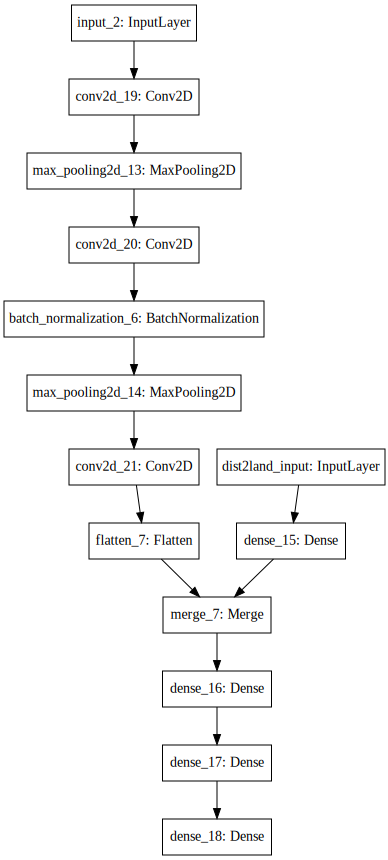

In [43]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_dense_on_input).create(prog='dot', format='svg'))

In [44]:
lr = 0.001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 15s - loss: 0.6430 - acc: 0.8041 - val_loss: 0.4881 - val_acc: 0.8297
Epoch 2/10
1996/1996 [==============================] - 15s - loss: 0.2681 - acc: 0.9048 - val_loss: 0.2903 - val_acc: 0.8998
Epoch 3/10
1996/1996 [==============================] - 15s - loss: 0.2032 - acc: 0.9238 - val_loss: 0.2720 - val_acc: 0.9038
Epoch 4/10
1996/1996 [==============================] - 15s - loss: 0.1420 - acc: 0.9514 - val_loss: 0.2009 - val_acc: 0.9359
Epoch 5/10
1996/1996 [==============================] - 15s - loss: 0.1272 - acc: 0.9594 - val_loss: 0.3066 - val_acc: 0.8898
Epoch 6/10
1996/1996 [==============================] - 15s - loss: 0.0842 - acc: 0.9709 - val_loss: 0.5793 - val_acc: 0.8858
Epoch 7/10
1996/1996 [==============================] - 15s - loss: 0.0827 - acc: 0.9724 - val_loss: 0.2436 - val_acc: 0.9359
Epoch 8/10
1996/1996 [==============================] - 15s - loss: 0.0

In [45]:
lr = 0.0001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 15s - loss: 0.0084 - acc: 0.9975 - val_loss: 0.2409 - val_acc: 0.9499
Epoch 2/5
1996/1996 [==============================] - 15s - loss: 0.0036 - acc: 0.9995 - val_loss: 0.2785 - val_acc: 0.9479
Epoch 3/5
1996/1996 [==============================] - 15s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.2728 - val_acc: 0.9539
Epoch 4/5
1996/1996 [==============================] - 15s - loss: 6.9285e-04 - acc: 1.0000 - val_loss: 0.2931 - val_acc: 0.9519
Epoch 5/5
1996/1996 [==============================] - 15s - loss: 2.5505e-04 - acc: 1.0000 - val_loss: 0.3083 - val_acc: 0.9499


In [46]:
lr = 0.0001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 15s - loss: 1.6558e-04 - acc: 1.0000 - val_loss: 0.3238 - val_acc: 0.9539
Epoch 2/5
1996/1996 [==============================] - 15s - loss: 8.9031e-05 - acc: 1.0000 - val_loss: 0.3393 - val_acc: 0.9479
Epoch 3/5
1996/1996 [==============================] - 15s - loss: 7.8395e-05 - acc: 1.0000 - val_loss: 0.3758 - val_acc: 0.9539
Epoch 4/5
1996/1996 [==============================] - 15s - loss: 3.1067e-05 - acc: 1.0000 - val_loss: 0.3512 - val_acc: 0.9539
Epoch 5/5
1996/1996 [==============================] - 15s - loss: 1.0868e-05 - acc: 1.0000 - val_loss: 0.3563 - val_acc: 0.9519


In [47]:
lr = 0.00001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 15s - loss: 1.5855e-05 - acc: 1.0000 - val_loss: 0.3591 - val_acc: 0.9559
Epoch 2/2
1996/1996 [==============================] - 15s - loss: 6.4067e-06 - acc: 1.0000 - val_loss: 0.3613 - val_acc: 0.9539


In [48]:
lr = 0.00001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 15s - loss: 1.8189e-05 - acc: 1.0000 - val_loss: 0.3734 - val_acc: 0.9559
Epoch 2/2
1996/1996 [==============================] - 15s - loss: 5.1773e-06 - acc: 1.0000 - val_loss: 0.3653 - val_acc: 0.9539


In [49]:
lr = 0.000001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 15s - loss: 4.1303e-06 - acc: 1.0000 - val_loss: 0.3671 - val_acc: 0.9539
Epoch 2/2
1996/1996 [==============================] - 15s - loss: 5.2230e-06 - acc: 1.0000 - val_loss: 0.3692 - val_acc: 0.9559


CHECK: More dense definiately helping - can we remove the distance feature?

## baseline + batchnorm without distance feature + more dense later layers

In [50]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
out = Dense(num_classes, activation='softmax')(x)

model_dense_no_distance = Model(inputs=classifier_input, outputs=out)
model_dense_no_distance.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model_dense_no_distance.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 25, 25, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 64)        36928     
__________

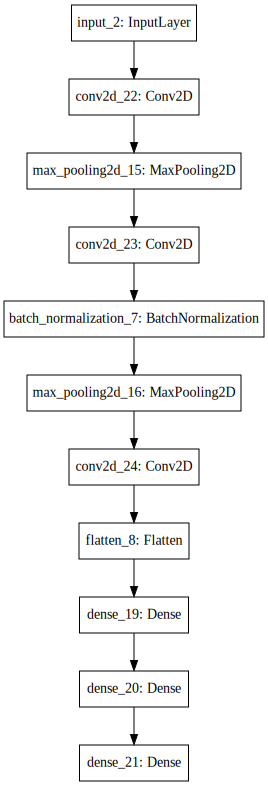

In [52]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_dense_no_distance).create(prog='dot', format='svg'))

In [54]:
lr = 0.001
K.set_value(model_dense_no_distance.optimizer.lr, lr)
model_dense_no_distance.fit(np_train_crops, np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=(np_valid_crops, np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 15s - loss: 0.8273 - acc: 0.7851 - val_loss: 0.5648 - val_acc: 0.8317
Epoch 2/10
1996/1996 [==============================] - 15s - loss: 0.3042 - acc: 0.8903 - val_loss: 0.4243 - val_acc: 0.8617
Epoch 3/10
1996/1996 [==============================] - 15s - loss: 0.2027 - acc: 0.9233 - val_loss: 0.6443 - val_acc: 0.7114
Epoch 4/10
1996/1996 [==============================] - 15s - loss: 0.1551 - acc: 0.9444 - val_loss: 0.6469 - val_acc: 0.8557
Epoch 5/10
1996/1996 [==============================] - 15s - loss: 0.1220 - acc: 0.9584 - val_loss: 0.2457 - val_acc: 0.9218
Epoch 6/10
1996/1996 [==============================] - 15s - loss: 0.1066 - acc: 0.9614 - val_loss: 0.2631 - val_acc: 0.9399
Epoch 7/10
1996/1996 [==============================] - 15s - loss: 0.0957 - acc: 0.9739 - val_loss: 0.3901 - val_acc: 0.9158
Epoch 8/10
1996/1996 [==============================] - 15s - loss: 0.0

In [56]:
lr = 0.001
K.set_value(model_dense_no_distance.optimizer.lr, lr)
model_dense_no_distance.fit(np_train_crops, np_train_class,
          batch_size=32,
          epochs=3,
          validation_data=(np_valid_crops, np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/3
1996/1996 [==============================] - 15s - loss: 0.0415 - acc: 0.9870 - val_loss: 0.3586 - val_acc: 0.9379
Epoch 2/3
1996/1996 [==============================] - 15s - loss: 0.0467 - acc: 0.9850 - val_loss: 0.2151 - val_acc: 0.9559
Epoch 3/3
1996/1996 [==============================] - 15s - loss: 0.0210 - acc: 0.9935 - val_loss: 0.3682 - val_acc: 0.9419


In [57]:
lr = 0.0001
K.set_value(model_dense_no_distance.optimizer.lr, lr)
model_dense_no_distance.fit(np_train_crops, np_train_class,
          batch_size=32,
          epochs=3,
          validation_data=(np_valid_crops, np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/3
1996/1996 [==============================] - 15s - loss: 0.0081 - acc: 0.9975 - val_loss: 0.3660 - val_acc: 0.9479
Epoch 2/3
1996/1996 [==============================] - 15s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3674 - val_acc: 0.9519
Epoch 3/3
1996/1996 [==============================] - 15s - loss: 2.6581e-04 - acc: 1.0000 - val_loss: 0.3836 - val_acc: 0.9539


In [58]:
lr = 0.0001
K.set_value(model_dense_no_distance.optimizer.lr, lr)
model_dense_no_distance.fit(np_train_crops, np_train_class,
          batch_size=32,
          epochs=3,
          validation_data=(np_valid_crops, np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/3
1996/1996 [==============================] - 15s - loss: 8.4196e-05 - acc: 1.0000 - val_loss: 0.4175 - val_acc: 0.9539
Epoch 2/3
1996/1996 [==============================] - 15s - loss: 6.3781e-05 - acc: 1.0000 - val_loss: 0.4107 - val_acc: 0.9559
Epoch 3/3
1996/1996 [==============================] - 15s - loss: 1.1616e-05 - acc: 1.0000 - val_loss: 0.4591 - val_acc: 0.9519


In [59]:
lr = 0.00001
K.set_value(model_dense_no_distance.optimizer.lr, lr)
model_dense_no_distance.fit(np_train_crops, np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=(np_valid_crops, np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 15s - loss: 5.1444e-06 - acc: 1.0000 - val_loss: 0.4590 - val_acc: 0.9539
Epoch 2/2
1996/1996 [==============================] - 15s - loss: 3.0396e-06 - acc: 1.0000 - val_loss: 0.4589 - val_acc: 0.9539
